### Model Training - Hyper parameter --- We will take our dataset which was created earlier as train_final_data and test_final_Data

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.8MB 40kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
pd.set_option('display.max_columns', None)
%matplotlib inline

### Feature Processing
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from dateutil import relativedelta

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### Metrics
import sklearn.metrics as metrics

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingClassifier


In [ ]:
train_new = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/train_data_final.xlsx')
test_new = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_data_final.xlsx')
display(train_new.head())
display(test_new.head())
print(train_new.shape)
print(test_new.shape)

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568,21946,61.11,49,35833.33,464993,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062,34802,70.00,23,666.67,466001,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060,127335,69.77,39,45257.00,462030,6,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060,25094,80.92,24,20833.33,473335,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046,21853,71.05,56,27313.67,495442,2,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,2,46,480000,365000.0,365000.0,1000.0,1046,22354,75.83,50,32069.00,473001,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,45,480000,285000.0,285000.0,9300.0,1046,22354,57.44,35,25000.00,473001,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,48,580000,400000.0,400000.0,35800.0,1060,65929,68.97,37,23333.33,473001,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,154,36,725000,500000.0,500000.0,52000.0,1049,68597,61.79,55,91666.67,493558,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,194,48,617000,400000.0,400000.0,35400.0,1049,38493,59.09,48,12500.00,754137,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


(128654, 50)
(14745, 49)


In [ ]:
y = train_new['top_up_class']
X = train_new.drop('top_up_class',axis=1)
print(X.shape,y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 49) (25731, 49) (102923,) (25731,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)
test_new_st = sc.transform(test_new)

In [ ]:
estimators_st = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=100)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators_st, X_train, y_train):
    for m in estimators_st:
        estimators_st[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators_st, X_train_st, y_train)

def mpredict(estimators_st, X_test_st, y_test):
    outcome = dict()
    for m in estimators_st:
        y_pred = estimators_st[m][0].predict(X_test_st)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome


outcome_st = mpredict(estimators_st, X_test_st, y_test)

for m in outcome_st:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome_st[m][0],4))
    print('Accuracy Score', round(outcome_st[m][1],4))
    print('Classification report \n ')
    print(outcome_st[m][2])
    print('\n')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression fitted
KNN fitted
Decision Tree fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------Logistic Regression------------------------
F1 Score 0.1303
Accuracy Score 0.8269
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     21279
           1       0.00      0.00      0.00      1642
           2       0.00      0.00      0.00       761
           3       0.00      0.00      0.00       683
           4       1.00      0.00      0.00       663
           5       0.17      0.00      0.00       502
           6       0.00      0.00      0.00       201

    accuracy                           0.83     25731
   macro avg       0.28      0.14      0.13     25731
weighted avg       0.71      0.83      0.75     25731



------------------------KNN------------------------
F1 Score 0.1515
Accuracy Score 0.815
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     21279
           1       0.19      0.03      0.05    

### Hyper parameter tunning

#### KNN Model

In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)

In [ ]:
f1 = metrics.make_scorer(metrics.f1_score,average='macro')

In [ ]:
f1

In [ ]:
model_knn = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Create the random grid
random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_knn = RandomizedSearchCV(estimator = model_knn, param_distributions = random_grid,scoring=f1, n_iter = 10, cv = 5, verbose=2, random_state=1, n_jobs = 1)

rf_knn.fit(X_st,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, n_neighbors=19, metric=manhattan, total= 1.9min
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV]  weights=distance, n_neighbors=19, metric=manhattan, total= 2.2min
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total= 1.9min
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total= 2.1min
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total= 1.9min
[CV] weights=distance, n_neighbors=1, metric=minkowski ...............
[CV]  weights=distance, n_neighbors=1, metric=minkowski, total=  51.7s
[CV] weights=distance, n_neighbors=1, metric=minkowski ...............
[CV]  weights=distance, n_neighbors=1, metric=minkowski, total= 1.0min
[CV] weights=distance, n_neighbors=1, metric=minkowski ...............
[CV]  weights=distance, n_neighbors=1, metric=minkowski, total=  56.0s
[CV] weights=distance, n_neighbors=1, metric=minkowski ...............
[C

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 68.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 21, 2),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   return_train_score=False,
                   scoring=make_scorer(f1_score, average=macro), ve

In [ ]:
rf_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}

In [ ]:
model_knn_final = KNeighborsClassifier(metric='minkowski',n_neighbors=1,weights='distance')
model_knn_final = model_knn_final.fit(X_train_st,y_train)

y_pred = model_knn_final.predict(X_test_st)
print('------------------------KNN MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------KNN MODEL------------------------
F1 Score 0.19125741923931133
Accuracy Score 0.713808246861762
Classification report 
 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     21279
           1       0.14      0.14      0.14      1642
           2       0.07      0.07      0.07       761
           3       0.10      0.11      0.11       683
           4       0.07      0.06      0.07       663
           5       0.09      0.08      0.08       502
           6       0.03      0.03      0.03       201

    accuracy                           0.71     25731
   macro avg       0.19      0.19      0.19     25731
weighted avg       0.71      0.71      0.71     25731





### Random Forest

In [ ]:
#Randomized Search CV

model_rf = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid,scoring=f1, n_iter = 10, cv = 5, verbose=2, random_state=1, n_jobs = 1)

rf_random.fit(X_st,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total= 1.5min
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total= 1.4min
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total= 1.5min
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total= 1.5min
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total= 1.5min
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5, total=  51.6s
[CV] n_estimators=800, min_samples_split=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 40.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 100}

In [ ]:
model_rf_final = RandomForestClassifier(max_depth=30,max_features='auto',min_samples_leaf=5,min_samples_split=15,n_estimators=100)
model_rf_final = model_rf_final.fit(X_train_st,y_train)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.12932695522152185
Accuracy Score 0.8269014029769539
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     21279
           1       0.00      0.00      0.00      1642
           2       0.00      0.00      0.00       761
           3       0.00      0.00      0.00       683
           4       0.00      0.00      0.00       663
           5       0.00      0.00      0.00       502
           6       0.00      0.00      0.00       201

    accuracy                           0.83     25731
   macro avg       0.12      0.14      0.13     25731
weighted avg       0.68      0.83      0.75     25731





/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Gradient Boosting Classifier

In [ ]:
# define models and parameters
model_gbm = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9,12,15]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'subsample': subsample,
               'max_depth':max_depth}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
gbm_rs = RandomizedSearchCV(estimator = model_gbm, param_distributions = random_grid,scoring=f1, n_iter = 10, cv = 5, verbose=2, random_state=1, n_jobs = 1)

gbm_rs.fit(X_st,y)

In [ ]:
gbm_rs.best_params_

In [ ]:
model_gbm_final = GradientBoostingClassifier()
model_gbm_final = model_gbm_final.fit(X_train_st,y_train)

y_pred = model_gbm_final.predict(X_test_st)
print('------------------------GBM MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

### Decision Tree Classifier 

In [ ]:
model_dt = DecisionTreeClassifier()

criterion = ['gini', 'entropy']
max_depth = [5,10,15,20,25,30,35]

# Create the random grid
random_grid = {'criterion': criterion,
               'max_depth': max_depth}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
dt_rs = RandomizedSearchCV(estimator = model_dt, param_distributions = random_grid,scoring=f1, n_iter = 10, cv = 5, verbose=2, random_state=1, n_jobs = 1)

dt_rs.fit(X_st,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_depth=20, criterion=gini ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=20, criterion=gini, total=   1.6s
[CV] max_depth=20, criterion=gini ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ..................... max_depth=20, criterion=gini, total=   1.6s
[CV] max_depth=20, criterion=gini ....................................
[CV] ..................... max_depth=20, criterion=gini, total=   1.6s
[CV] max_depth=20, criterion=gini ....................................
[CV] ..................... max_depth=20, criterion=gini, total=   1.6s
[CV] max_depth=20, criterion=gini ....................................
[CV] ..................... max_depth=20, criterion=gini, total=   1.6s
[CV] max_depth=5, criterion=entropy ..................................
[CV] ................... max_depth=5, criterion=entropy, total=   0.8s
[CV] max_depth=5, criterion=entropy ..................................
[CV] ................... max_depth=5, criterion=entropy, total=   0.8s
[CV] max_depth=5, criterion=entropy ..................................
[CV] ................... max_depth=5, criterion=entropy, total=   0.8s
[CV] max_depth=5, criterion=entropy ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
dt_rs.best_params_

{'criterion': 'entropy', 'max_depth': 30}

In [ ]:
model_dt_final = DecisionTreeClassifier(max_depth=30,criterion='entropy')
model_dt_final = model_dt_final.fit(X_train_st,y_train)

y_pred = model_dt_final.predict(X_test_st)
print('------------------------DT MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------DT MODEL------------------------
F1 Score 0.2009216028294303
Accuracy Score 0.6983016594768956
Classification report 
 
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     21279
           1       0.13      0.15      0.14      1642
           2       0.08      0.09      0.08       761
           3       0.11      0.13      0.12       683
           4       0.10      0.11      0.11       663
           5       0.09      0.10      0.10       502
           6       0.03      0.04      0.04       201

    accuracy                           0.70     25731
   macro avg       0.20      0.20      0.20     25731
weighted avg       0.71      0.70      0.71     25731





#### Only Taking Imp Features from Original Dataset

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/train_data_missing_values_handled.xlsx')
dataset.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,1568,21946,61.11,M,49,35833.33,MADHYA PRADESH,464993,1
1,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,1062,34802,70.00,M,23,666.67,MADHYA PRADESH,466001,0
2,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,1060,127335,69.77,M,39,45257.00,MADHYA PRADESH,462030,6
3,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,1060,25094,80.92,M,24,20833.33,MADHYA PRADESH,473335,1
4,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,1046,21853,71.05,M,56,27313.67,CHATTISGARH,495442,2


In [ ]:
dataset.isnull().sum()

Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
AmountFinance      0
DisbursalAmount    0
EMI                0
DisbursalDate      0
MaturityDAte       0
AuthDate           0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
top_up_class       0
dtype: int64

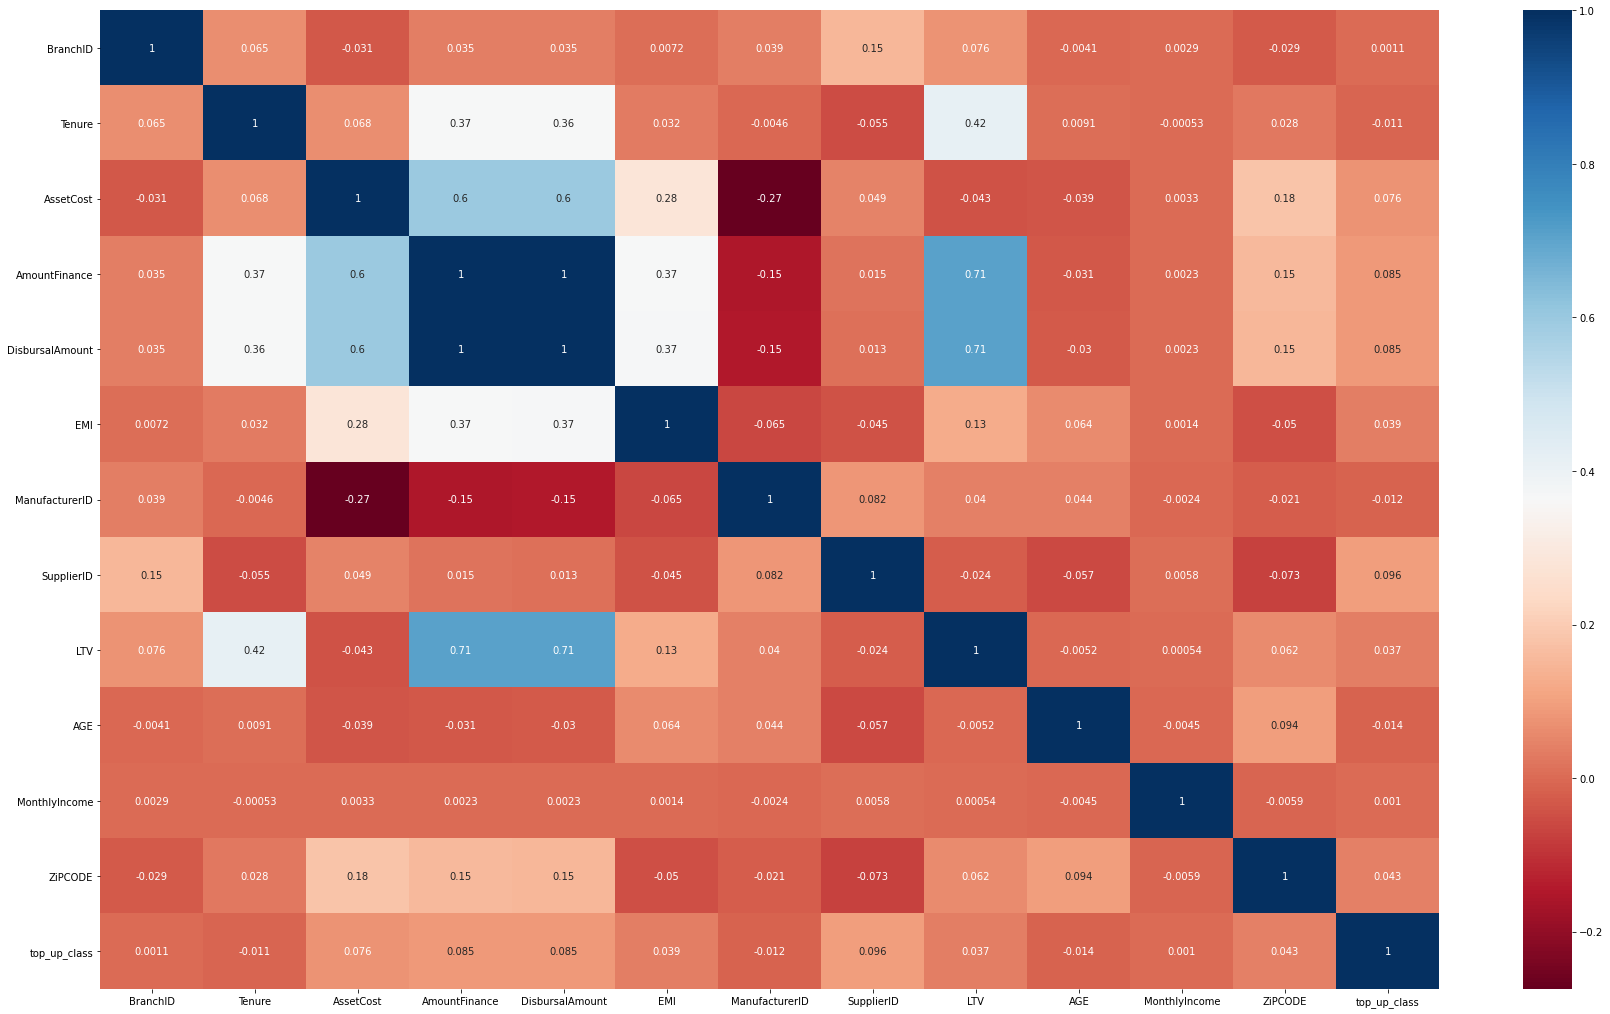

In [ ]:
plt.figure(figsize=(30, 18))
sns.heatmap(dataset.corr(),annot=True,cmap='RdBu')
plt.show()

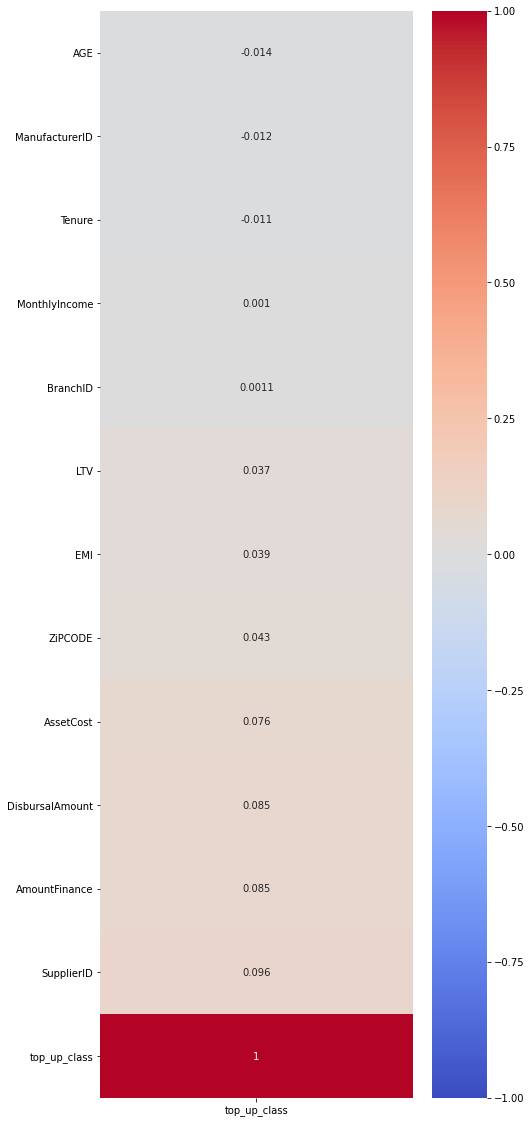

In [ ]:
plt.figure(figsize=(7, 20))
sns.heatmap(dataset.corr()[['top_up_class']].sort_values(by='top_up_class'), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 

In [ ]:
dataset_only_independent = dataset.copy()
dataset_only_independent = dataset_only_independent.drop(['top_up_class'],axis=1)
dataset_only_independent.head(2)

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE
0,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,1568,21946,61.11,M,49,35833.33,MADHYA PRADESH,464993
1,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,1062,34802,70.00,M,23,666.67,MADHYA PRADESH,466001


In [ ]:
def high_correlation_train_set_indpendent(dataset,threshold):
    col_corr = set() #Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # It also consider -ve corr - You can remove abs() - If you dont wont to consider -ve corr
            if abs(corr_matrix.iloc[i,j]) > threshold: 
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

### These function return correlated features which are to be removed , Becaause they are correlated with any other feature

In [ ]:
corr_features = high_correlation_train_set_indpendent(dataset_only_independent,0.7)
corr_features

{'DisbursalAmount', 'LTV'}

In [ ]:
dataset = dataset.drop(corr_features,axis=1)
dataset.shape

(128654, 20)

In [ ]:
dataset.columns

Index(['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'BranchID',
       'Tenure', 'AssetCost', 'AmountFinance', 'EMI', 'DisbursalDate',
       'MaturityDAte', 'AuthDate', 'ManufacturerID', 'SupplierID', 'SEX',
       'AGE', 'MonthlyIncome', 'State', 'ZiPCODE', 'top_up_class'],
      dtype='object')

In [ ]:
dataset = dataset.drop(['DisbursalDate','MaturityDAte','AuthDate'],axis=1)
dataset.shape

(128654, 17)

In [ ]:
dataset.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,24000.0,1568,21946,M,49,35833.33,MADHYA PRADESH,464993,1
1,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,10500.0,1062,34802,M,23,666.67,MADHYA PRADESH,466001,0
2,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,38300.0,1060,127335,M,39,45257.00,MADHYA PRADESH,462030,6
3,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,11600.0,1060,25094,M,24,20833.33,MADHYA PRADESH,473335,1
4,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,15000.0,1046,21853,M,56,27313.67,CHATTISGARH,495442,2


In [ ]:
mean_encoding_state = dataset.groupby(['State'])['top_up_class'].mean().to_dict()
mean_encoding_state

{'ANDHRA PRADESH': 0.6435664823662033,
 'ASSAM': 0.0,
 'BIHAR': 0.6074623051367237,
 'CHANDIGARH': 0.0,
 'CHATTISGARH': 0.2698237885462555,
 'DADRA AND NAGAR HAVELI': 0.0,
 'DELHI': 0.3333333333333333,
 'GUJARAT': 0.2895519429024584,
 'HARYANA': 0.5335540838852098,
 'HIMACHAL PRADESH': 0.13513513513513514,
 'JHARKHAND': 0.0,
 'KARNATAKA': 0.43677068026622873,
 'MADHYA PRADESH': 0.425186967208828,
 'MAHARASHTRA': 0.3885280193768579,
 'ORISSA': 0.43008397225264694,
 'PUNJAB': 0.38738317757009344,
 'RAJASTHAN': 0.18556061232933388,
 'TAMIL NADU': 0.0,
 'TELANGANA': 1.3395616241466044,
 'UTTAR PRADESH': 0.3320645027337532,
 'UTTARAKHAND': 0.25,
 'WEST BENGAL': 0.385639733669246}

In [ ]:
dataset['State'] = dataset['State'].map(mean_encoding_state)
dataset.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,24000.0,1568,21946,M,49,35833.33,0.425187,464993,1
1,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,10500.0,1062,34802,M,23,666.67,0.425187,466001,0
2,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,38300.0,1060,127335,M,39,45257.00,0.425187,462030,6
3,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,11600.0,1060,25094,M,24,20833.33,0.425187,473335,1
4,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,15000.0,1046,21853,M,56,27313.67,0.269824,495442,2


In [ ]:
dataset['PaymentMode'] = dataset['PaymentMode'].map(dataset.groupby(['PaymentMode'])['top_up_class'].mean().to_dict())
dataset.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,0.186877,1,48,450000,275000.0,24000.0,1568,21946,M,49,35833.33,0.425187,464993,1
1,Monthly,Advance,Closed,0.255776,333,47,485000,350000.0,10500.0,1062,34802,M,23,666.67,0.425187,466001,0
2,Quatrly,Arrear,Active,0.668451,1,68,690000,519728.0,38300.0,1060,127335,M,39,45257.00,0.425187,462030,6
3,Monthly,Advance,Closed,0.168888,125,48,480000,400000.0,11600.0,1060,25094,M,24,20833.33,0.425187,473335,1
4,Monthly,Arrear,Closed,0.168888,152,44,619265,440000.0,15000.0,1046,21853,M,56,27313.67,0.269824,495442,2


In [ ]:
dataset['ZiPCODE'] = dataset['ZiPCODE'].map(dataset.groupby(['ZiPCODE'])['top_up_class'].mean().to_dict())
dataset.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,0.186877,1,48,450000,275000.0,24000.0,1568,21946,M,49,35833.33,0.425187,0.250000,1
1,Monthly,Advance,Closed,0.255776,333,47,485000,350000.0,10500.0,1062,34802,M,23,666.67,0.425187,0.360000,0
2,Quatrly,Arrear,Active,0.668451,1,68,690000,519728.0,38300.0,1060,127335,M,39,45257.00,0.425187,0.652174,6
3,Monthly,Advance,Closed,0.168888,125,48,480000,400000.0,11600.0,1060,25094,M,24,20833.33,0.425187,0.322034,1
4,Monthly,Arrear,Closed,0.168888,152,44,619265,440000.0,15000.0,1046,21853,M,56,27313.67,0.269824,0.500000,2


In [ ]:
dataset.dtypes

Frequency          object
InstlmentMode      object
LoanStatus         object
PaymentMode       float64
BranchID            int64
Tenure              int64
AssetCost           int64
AmountFinance     float64
EMI               float64
ManufacturerID      int64
SupplierID          int64
SEX                object
AGE                 int64
MonthlyIncome     float64
State             float64
ZiPCODE           float64
top_up_class        int64
dtype: object

In [ ]:
dataset = pd.get_dummies(dataset,drop_first=True)
dataset.head()

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,0.250000,1,0,1,0,1,1,1
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,0.360000,0,0,1,0,0,1,1
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,0.652174,6,0,0,1,1,0,1
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,0.322034,1,0,1,0,0,1,1
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,0.500000,2,0,1,0,1,1,1


In [ ]:
dataset.shape

(128654, 19)

In [ ]:
dataset.head()

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,0.250000,1,0,1,0,1,1,1
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,0.360000,0,0,1,0,0,1,1
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,0.652174,6,0,0,1,1,0,1
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,0.322034,1,0,1,0,0,1,1
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,0.500000,2,0,1,0,1,1,1


In [ ]:
dataset.to_excel('train_dataset_mean_encoded.xlsx')

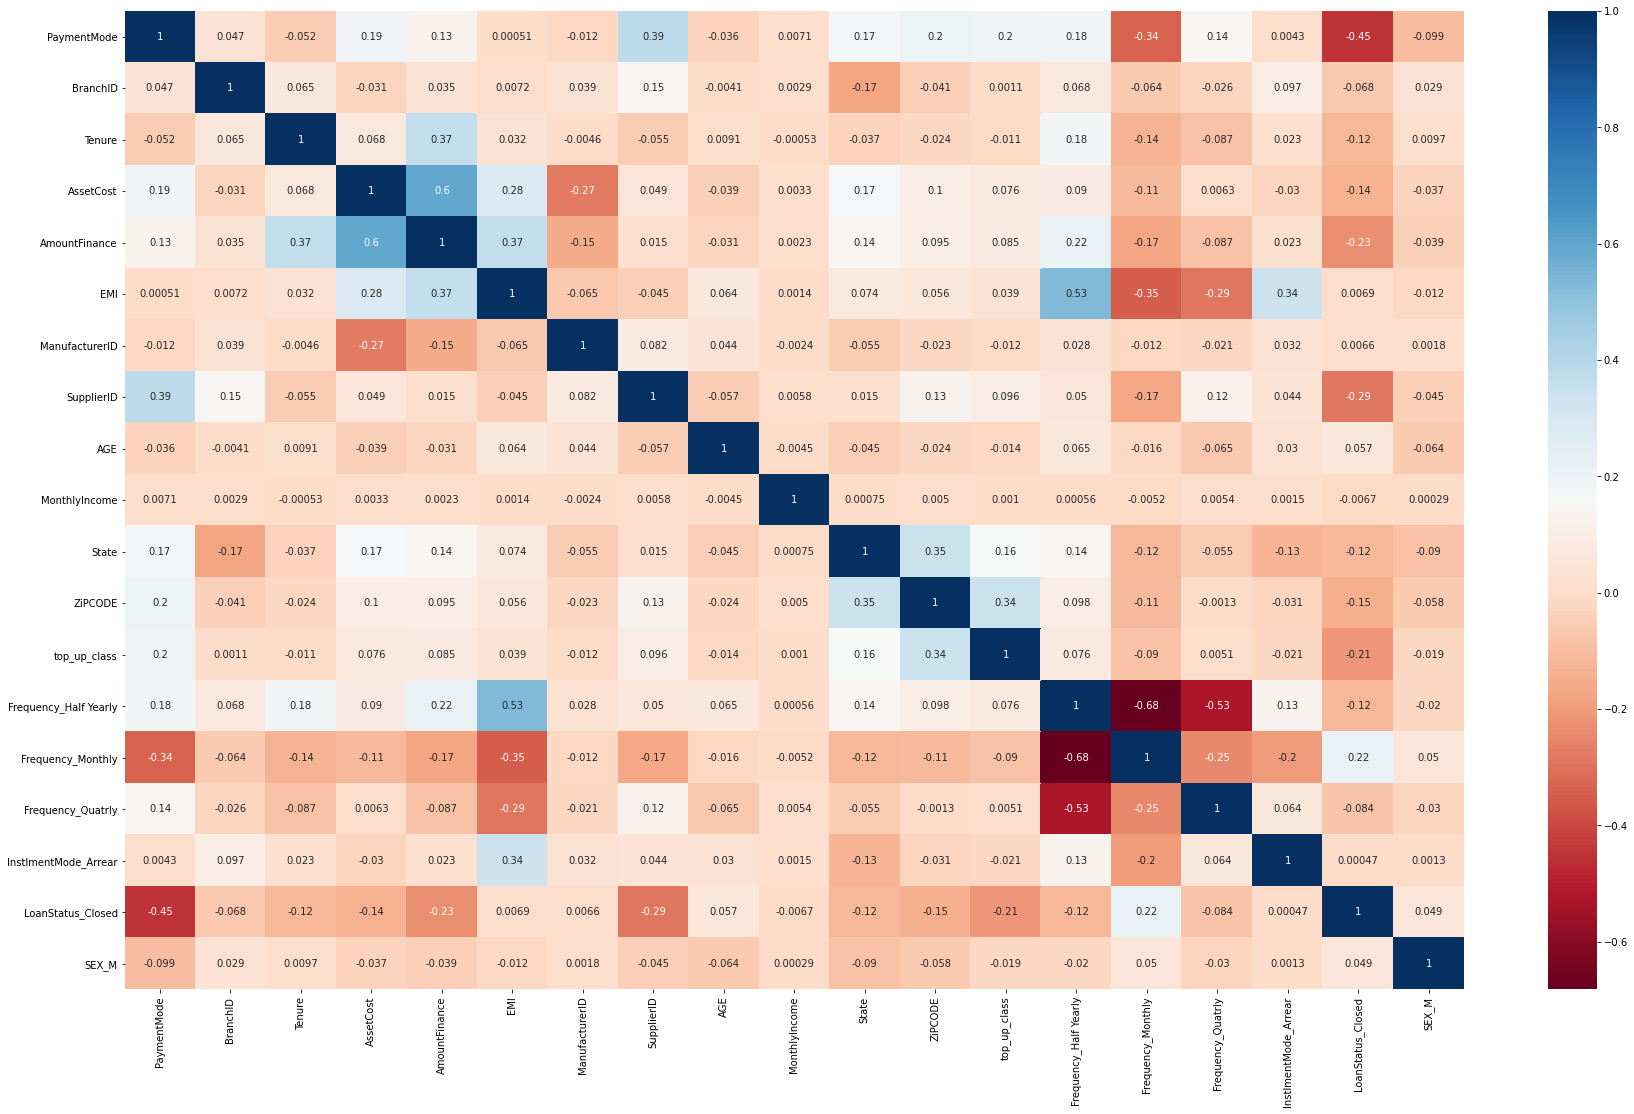

In [ ]:
plt.figure(figsize=(30, 18))
sns.heatmap(dataset.corr(),annot=True,cmap='RdBu')
plt.show()

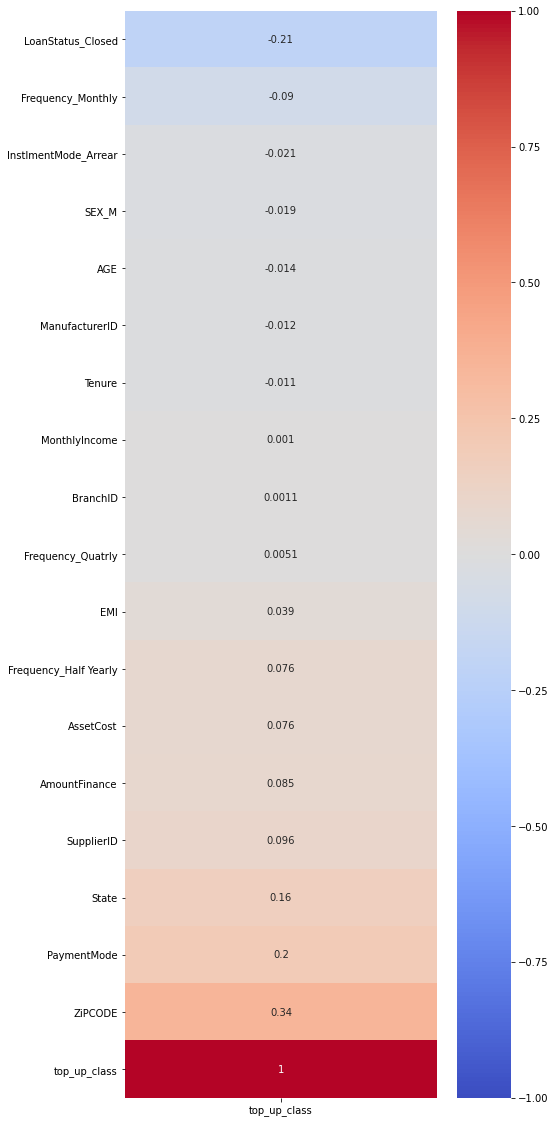

In [ ]:
plt.figure(figsize=(7, 20))
sns.heatmap(dataset.corr()[['top_up_class']].sort_values(by='top_up_class'), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 

In [ ]:
dataset.head()

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,0.250000,1,0,1,0,1,1,1
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,0.360000,0,0,1,0,0,1,1
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,0.652174,6,0,0,1,1,0,1
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,0.322034,1,0,1,0,0,1,1
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,0.500000,2,0,1,0,1,1,1


In [ ]:
y = dataset['top_up_class']
X = dataset.drop('top_up_class',axis=1)

print(X.shape,y.shape)

(128654, 18) (128654,)


In [ ]:
X.head()

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,0.250000,0,1,0,1,1,1
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,0.360000,0,1,0,0,1,1
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,0.652174,0,0,1,1,0,1
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,0.322034,0,1,0,0,1,1
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,0.500000,0,1,0,1,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 18) (25731, 18) (102923,) (25731,)


### Model Building 

In [ ]:
#creating a dictionary of the models(estimators) 
estimators = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=100)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators, X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression fitted
KNN fitted
Decision Tree fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


In [ ]:
#applying the fitted models to the test dataset
def mpredict(estimators, X_test, y_test):
    outcome = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome

outcome = mpredict(estimators, X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome[m][0],4))
    print('Accuracy Score', round(outcome[m][1],4))
    print('Classification report \n ')
    print(outcome[m][2])
    print('\n')

------------------------Logistic Regression------------------------
F1 Score 0.1293
Accuracy Score 0.827
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     21279
           1       0.00      0.00      0.00      1642
           2       0.00      0.00      0.00       761
           3       0.00      0.00      0.00       683
           4       0.00      0.00      0.00       663
           5       0.00      0.00      0.00       502
           6       0.00      0.00      0.00       201

    accuracy                           0.83     25731
   macro avg       0.12      0.14      0.13     25731
weighted avg       0.68      0.83      0.75     25731



------------------------KNN------------------------
F1 Score 0.1341
Accuracy Score 0.8198
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     21279
           1       0.11      0.01      0.02    

### Model Training - Standard Scaling

In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
estimators_st = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=100)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators_st, X_train, y_train):
    for m in estimators_st:
        estimators_st[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators_st, X_train_st, y_train)

def mpredict(estimators_st, X_test_st, y_test):
    outcome = dict()
    for m in estimators_st:
        y_pred = estimators_st[m][0].predict(X_test_st)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome


outcome_st = mpredict(estimators_st, X_test_st, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression fitted
KNN fitted
Decision Tree fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for m in outcome_st:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome_st[m][0],4))
    print('Accuracy Score', round(outcome_st[m][1],4))
    print('Classification report \n ')
    print(outcome_st[m][2])
    print('\n')

------------------------Logistic Regression------------------------
F1 Score 0.1642
Accuracy Score 0.8271
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     21279
           1       0.00      0.00      0.00      1642
           2       0.00      0.00      0.00       761
           3       0.17      0.01      0.02       683
           4       0.50      0.04      0.07       663
           5       0.33      0.07      0.12       502
           6       0.50      0.02      0.04       201

    accuracy                           0.83     25731
   macro avg       0.33      0.16      0.16     25731
weighted avg       0.71      0.83      0.75     25731



------------------------KNN------------------------
F1 Score 0.1778
Accuracy Score 0.8154
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     21279
           1       0.16      0.03      0.05   

#### Test Data Preprocessing 

In [ ]:
train_data = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/train_data_missing_values_handled.xlsx')
train_data.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,1568,21946,61.11,M,49,35833.33,MADHYA PRADESH,464993,1
1,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,1062,34802,70.00,M,23,666.67,MADHYA PRADESH,466001,0
2,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,1060,127335,69.77,M,39,45257.00,MADHYA PRADESH,462030,6
3,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,1060,25094,80.92,M,24,20833.33,MADHYA PRADESH,473335,1
4,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,1046,21853,71.05,M,56,27313.67,CHATTISGARH,495442,2


In [ ]:
test_data = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
test_data.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,365000.0,1000.0,2011-12-29,2015-10-05,2011-12-29,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,285000.0,9300.0,2012-04-28,2016-01-01,2012-04-28,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,400000.0,35800.0,2013-10-22,2017-09-10,2013-10-22,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,500000.0,52000.0,2013-05-21,2016-02-10,2013-05-21,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,400000.0,35400.0,2012-11-30,2016-12-05,2012-11-30,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0


In [ ]:
test_data = test_data.drop(['ID','AssetID','Area','City','DisbursalDate','MaturityDAte','AuthDate','DisbursalAmount', 'LTV'],axis=1)
test_data.shape

(14745, 16)

In [ ]:
test_data.isnull().sum()

Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
AmountFinance      0
EMI                0
ManufacturerID     2
SupplierID         0
SEX                5
AGE                7
MonthlyIncome     14
State              0
ZiPCODE            1
dtype: int64

In [ ]:
test_data['AGE'] =test_data['AGE'].fillna(X['AGE'].median())
test_data['MonthlyIncome'] =test_data['MonthlyIncome'].fillna(X['MonthlyIncome'].median())
test_data['ManufacturerID'] = test_data['ManufacturerID'].fillna(X['ManufacturerID'].mode()[0])
test_data['SEX'] = test_data['SEX'].fillna(test_data['SEX'].value_counts().index[0])
test_data.isnull().sum()

Frequency         0
InstlmentMode     0
LoanStatus        0
PaymentMode       0
BranchID          0
Tenure            0
AssetCost         0
AmountFinance     0
EMI               0
ManufacturerID    0
SupplierID        0
SEX               0
AGE               0
MonthlyIncome     0
State             0
ZiPCODE           1
dtype: int64

In [ ]:
test_data[test_data['ZiPCODE'].isnull()]

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,SEX,AGE,MonthlyIncome,State,ZiPCODE
511,Half Yearly,Arrear,Closed,Billed,76,60,550000,470000.0,75000.0,1049.0,23892,M,28.0,5947.33,MADHYA PRADESH,NaN


In [ ]:
test_data.iloc[511,-1]=464228

In [ ]:
test_data.iloc[511]

Frequency            Half Yearly
InstlmentMode             Arrear
LoanStatus                Closed
PaymentMode               Billed
BranchID                      76
Tenure                        60
AssetCost                 550000
AmountFinance             470000
EMI                        75000
ManufacturerID              1049
SupplierID                 23892
SEX                            M
AGE                           28
MonthlyIncome            5947.33
State             MADHYA PRADESH
ZiPCODE                   464228
Name: 511, dtype: object

In [ ]:
test_data.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,SEX,AGE,MonthlyIncome,State,ZiPCODE
0,Monthly,Advance,Closed,PDC_E,2,46,480000,365000.0,1000.0,1046.0,22354,M,50.0,32069.00,MADHYA PRADESH,473001.0
1,Monthly,Advance,Closed,PDC,2,45,480000,285000.0,9300.0,1046.0,22354,M,35.0,25000.00,MADHYA PRADESH,473001.0
2,Quatrly,Arrear,Closed,PDC,2,48,580000,400000.0,35800.0,1060.0,65929,M,37.0,23333.33,MADHYA PRADESH,473001.0
3,Half Yearly,Arrear,Closed,Billed,154,36,725000,500000.0,52000.0,1049.0,68597,M,55.0,91666.67,CHATTISGARH,493558.0
4,Quatrly,Arrear,Closed,PDC,194,48,617000,400000.0,35400.0,1049.0,38493,M,48.0,12500.00,ORISSA,754137.0


In [ ]:
test_data.shape

(14745, 16)

In [ ]:
test_data.to_excel('test_data_missing_values_handled.xlsx')

In [ ]:
test_data['State'] = test_data['State'].map(mean_encoding_state)
test_data['PaymentMode'] = test_data['PaymentMode'].map(train_data.groupby(['PaymentMode'])['top_up_class'].mean().to_dict())
test_data['ZiPCODE'] = test_data['ZiPCODE'].map(train_data.groupby(['ZiPCODE'])['top_up_class'].mean().to_dict())
test_data = pd.get_dummies(test_data,drop_first=True)

In [ ]:
test_data.head()

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M
0,0.186877,2,46,480000,365000.0,1000.0,1046.0,22354,50.0,32069.00,0.425187,NaN,1,0,0,1,1
1,0.255776,2,45,480000,285000.0,9300.0,1046.0,22354,35.0,25000.00,0.425187,NaN,1,0,0,1,1
2,0.255776,2,48,580000,400000.0,35800.0,1060.0,65929,37.0,23333.33,0.425187,NaN,0,1,1,1,1
3,0.168888,154,36,725000,500000.0,52000.0,1049.0,68597,55.0,91666.67,0.269824,0.264901,0,0,1,1,1
4,0.255776,194,48,617000,400000.0,35400.0,1049.0,38493,48.0,12500.00,0.430084,0.000000,0,1,1,1,1


In [ ]:
test_data.shape

(14745, 17)

#### Combining Final Dataset with Encoded Features

In [ ]:
test_data_for_zip = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_data_final.xlsx')
test_data_zip = list(test_data_for_zip['ZiPCODE'])
test_data_zip

In [ ]:
test_d = pd.read_excel('/content/test_data_missing_values_handled.xlsx')
test_d = test_d.iloc[:,1:]
test_d['ZiPCODE']=test_data_zip
test_d.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,SEX,AGE,MonthlyIncome,State,ZiPCODE
0,Monthly,Advance,Closed,PDC_E,2,46,480000,365000.0,1000.0,1046,22354,M,50,32069.00,MADHYA PRADESH,473001
1,Monthly,Advance,Closed,PDC,2,45,480000,285000.0,9300.0,1046,22354,M,35,25000.00,MADHYA PRADESH,473001
2,Quatrly,Arrear,Closed,PDC,2,48,580000,400000.0,35800.0,1060,65929,M,37,23333.33,MADHYA PRADESH,473001
3,Half Yearly,Arrear,Closed,Billed,154,36,725000,500000.0,52000.0,1049,68597,M,55,91666.67,CHATTISGARH,493558
4,Quatrly,Arrear,Closed,PDC,194,48,617000,400000.0,35400.0,1049,38493,M,48,12500.00,ORISSA,754137


In [ ]:
test_d.isnull().sum()

Frequency         0
InstlmentMode     0
LoanStatus        0
PaymentMode       0
BranchID          0
Tenure            0
AssetCost         0
AmountFinance     0
EMI               0
ManufacturerID    0
SupplierID        0
SEX               0
AGE               0
MonthlyIncome     0
State             0
ZiPCODE           0
dtype: int64

In [ ]:
test_d.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,SEX,AGE,MonthlyIncome,State,ZiPCODE
0,Monthly,Advance,Closed,PDC_E,2,46,480000,365000.0,1000.0,1046,22354,M,50,32069.00,MADHYA PRADESH,473001
1,Monthly,Advance,Closed,PDC,2,45,480000,285000.0,9300.0,1046,22354,M,35,25000.00,MADHYA PRADESH,473001
2,Quatrly,Arrear,Closed,PDC,2,48,580000,400000.0,35800.0,1060,65929,M,37,23333.33,MADHYA PRADESH,473001
3,Half Yearly,Arrear,Closed,Billed,154,36,725000,500000.0,52000.0,1049,68597,M,55,91666.67,CHATTISGARH,493558
4,Quatrly,Arrear,Closed,PDC,194,48,617000,400000.0,35400.0,1049,38493,M,48,12500.00,ORISSA,754137


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/train_data_missing_values_handled.xlsx')
print(dataset.shape)

(128654, 22)


In [ ]:
dataset = dataset.drop(['DisbursalDate','MaturityDAte','AuthDate','DisbursalAmount', 'LTV'],axis=1)
dataset.shape

(128654, 17)

In [ ]:
dataset.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,24000.0,1568,21946,M,49,35833.33,MADHYA PRADESH,464993,1
1,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,10500.0,1062,34802,M,23,666.67,MADHYA PRADESH,466001,0
2,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,38300.0,1060,127335,M,39,45257.00,MADHYA PRADESH,462030,6
3,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,11600.0,1060,25094,M,24,20833.33,MADHYA PRADESH,473335,1
4,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,15000.0,1046,21853,M,56,27313.67,CHATTISGARH,495442,2


In [ ]:
final_df = pd.concat([dataset,test_d],axis=0)
final_df.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,24000.0,1568,21946,M,49,35833.33,MADHYA PRADESH,464993,1.0
1,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,10500.0,1062,34802,M,23,666.67,MADHYA PRADESH,466001,0.0
2,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,38300.0,1060,127335,M,39,45257.00,MADHYA PRADESH,462030,6.0
3,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,11600.0,1060,25094,M,24,20833.33,MADHYA PRADESH,473335,1.0
4,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,15000.0,1046,21853,M,56,27313.67,CHATTISGARH,495442,2.0


In [ ]:
final_df.shape

(143399, 17)

In [ ]:
final_df.isnull().sum()

Frequency             0
InstlmentMode         0
LoanStatus            0
PaymentMode           0
BranchID              0
Tenure                0
AssetCost             0
AmountFinance         0
EMI                   0
ManufacturerID        0
SupplierID            0
SEX                   0
AGE                   0
MonthlyIncome         0
State                 0
ZiPCODE               0
top_up_class      14745
dtype: int64

In [ ]:
mean_encoding_state = final_df.groupby(['State'])['top_up_class'].mean().to_dict()
mean_encoding_state

{'ANDHRA PRADESH': 0.6435664823662033,
 'ASSAM': 0.0,
 'BIHAR': 0.6074623051367237,
 'CHANDIGARH': 0.0,
 'CHATTISGARH': 0.2698237885462555,
 'DADRA AND NAGAR HAVELI': 0.0,
 'DELHI': 0.3333333333333333,
 'GUJARAT': 0.2895519429024584,
 'HARYANA': 0.5335540838852098,
 'HIMACHAL PRADESH': 0.13513513513513514,
 'JHARKHAND': 0.0,
 'KARNATAKA': 0.43677068026622873,
 'MADHYA PRADESH': 0.425186967208828,
 'MAHARASHTRA': 0.3885280193768579,
 'ORISSA': 0.43008397225264694,
 'PUNJAB': 0.38738317757009344,
 'RAJASTHAN': 0.18556061232933388,
 'TAMIL NADU': 0.0,
 'TELANGANA': 1.3395616241466044,
 'UTTAR PRADESH': 0.3320645027337532,
 'UTTARAKHAND': 0.25,
 'WEST BENGAL': 0.385639733669246}

In [ ]:
final_df.index = range(0,len(final_df))

In [ ]:
final_df['State'] = final_df['State'].map(mean_encoding_state)

In [ ]:
mean_enc_payment = final_df.groupby(['PaymentMode'])['top_up_class'].mean().to_dict()
mean_enc_payment

{'Auto Debit': 0.3262158956109134,
 'Billed': 0.16888804983953182,
 'Cheque': 0.6493212669683258,
 'Direct Debit': 0.6684505446074419,
 'ECS': 0.671169162153552,
 'ECS Reject': 0.2853717026378897,
 'Escrow': 1.2857142857142858,
 'PDC': 0.2557763835142954,
 'PDC Reject': 0.0,
 'PDC_E': 0.18687732716111502,
 'SI Reject': 0.42473118279569894}

In [ ]:
final_df['PaymentMode'] = final_df['PaymentMode'].map(mean_enc_payment)

In [ ]:
dataset.shape

(128654, 17)

In [ ]:
mean_zip_enc = dataset.groupby(['ZiPCODE'])['top_up_class'].mean().to_dict()
mean_zip_enc

{110000: 0.0,
 110003: 0.0,
 110012: 0.0,
 110016: 0.0,
 110036: 2.0,
 110094: 0.0,
 121001: 0.3333333333333333,
 121002: 0.0,
 121003: 0.0,
 121101: 0.6,
 121103: 1.1818181818181819,
 121104: 0.0,
 121105: 1.0,
 121106: 0.7333333333333333,
 121107: 1.263157894736842,
 122001: 0.2875,
 122003: 0.2,
 122004: 0.6470588235294118,
 122006: 0.0,
 122015: 0.0,
 122017: 0.75,
 122051: 0.8571428571428571,
 122052: 2.0,
 122100: 0.0,
 122101: 1.0769230769230769,
 122102: 0.6,
 122103: 0.5522388059701493,
 122104: 0.0,
 122105: 3.0,
 122107: 0.0,
 122413: 0.5416666666666666,
 122414: 0.5714285714285714,
 122502: 1.9090909090909092,
 122503: 1.05,
 122504: 0.0,
 122505: 2.0,
 122506: 0.96,
 122508: 0.0,
 123021: 1.6,
 123023: 0.0,
 123024: 0.8333333333333334,
 123027: 1.1764705882352942,
 123028: 0.6,
 123029: 1.2105263157894737,
 123034: 1.5,
 123035: 1.25,
 123101: 0.0,
 123102: 0.3333333333333333,
 123103: 0.0,
 123106: 1.0,
 123301: 0.0,
 123302: 0.0,
 123303: 5.0,
 123305: 0.1818181818181818

In [ ]:
final_df['ZiPCODE'] = final_df['ZiPCODE'].map(mean_zip_enc)
final_df.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,0.186877,1,48,450000,275000.0,24000.0,1568,21946,M,49,35833.33,0.425187,0.250000,1.0
1,Monthly,Advance,Closed,0.255776,333,47,485000,350000.0,10500.0,1062,34802,M,23,666.67,0.425187,0.360000,0.0
2,Quatrly,Arrear,Active,0.668451,1,68,690000,519728.0,38300.0,1060,127335,M,39,45257.00,0.425187,0.652174,6.0
3,Monthly,Advance,Closed,0.168888,125,48,480000,400000.0,11600.0,1060,25094,M,24,20833.33,0.425187,0.322034,1.0
4,Monthly,Arrear,Closed,0.168888,152,44,619265,440000.0,15000.0,1046,21853,M,56,27313.67,0.269824,0.500000,2.0


In [ ]:
final_df.shape

(143399, 17)

In [ ]:
final_df.isnull().sum()

Frequency             0
InstlmentMode         0
LoanStatus            0
PaymentMode           0
BranchID              0
Tenure                0
AssetCost             0
AmountFinance         0
EMI                   0
ManufacturerID        0
SupplierID            0
SEX                   0
AGE                   0
MonthlyIncome         0
State                 0
ZiPCODE            8424
top_up_class      14745
dtype: int64

In [ ]:
final_df = pd.get_dummies(final_df,drop_first=True)
final_df.head()

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,0.250000,1.0,0,1,0,1,1,1
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,0.360000,0.0,0,1,0,0,1,1
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,0.652174,6.0,0,0,1,1,0,1
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,0.322034,1.0,0,1,0,0,1,1
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,0.500000,2.0,0,1,0,1,1,1


In [ ]:
final_df.shape

(143399, 19)

In [ ]:
final_df.to_excel('cobined_dataset_encoded.xlsx')

In [ ]:
final_df.iloc[128653:128658,:]

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M
128653,0.668451,424,24,370000,200428.0,59200.0,1568,48879,33,178166.67,0.533554,2.500000,0.0,1,0,0,1,0,1
128654,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,NaN,NaN,0,1,0,0,1,1
128655,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,NaN,NaN,0,1,0,0,1,1
128656,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,NaN,NaN,0,0,1,1,1,1
128657,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,0.264901,NaN,1,0,0,1,1,1


In [ ]:
final_df.isnull().sum()

PaymentMode                  0
BranchID                     0
Tenure                       0
AssetCost                    0
AmountFinance                0
EMI                          0
ManufacturerID               0
SupplierID                   0
AGE                          0
MonthlyIncome                0
State                        0
ZiPCODE                   8424
top_up_class             14745
Frequency_Half Yearly        0
Frequency_Monthly            0
Frequency_Quatrly            0
InstlmentMode_Arrear         0
LoanStatus_Closed            0
SEX_M                        0
dtype: int64